<a href="https://colab.research.google.com/github/KOFIYEB/Blogging_with_AI_Text_Image_Generation/blob/main/Stable_Diffusion_XL_on__generated_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Generation from generated text from fined tuned Mistral 7B**

---





In this process, we leveraged the capabilities of the stable-diffusion-xl model, preferred for its enhanced capabilities over the earlier stable-diffusion-v1-5. This methodology lies in integrating Stable Diffusion XL for image generation, leveraging the textual output of the trained language model of Mistral 7B. This approach highlights the combination between different AI domains, adding a visual dimension to the textual output.

# **Loading base model**

In [ ]:
!pip install diffusers --upgrade

In [ ]:
from diffusers import DiffusionPipeline


In [ ]:
import torch
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
generator = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
generator.to("cuda")

# **Loading generated blog post from fined tuned Mistral 7B**

In [ ]:
with open('generated_blog_post.txt', 'r', encoding='utf-8') as file:
    generated_blog_post = file.read()

print(generated_blog_post)


The fitness industry has undergone significant changes over the years, adapting to the evolving needs and preferences of individuals seeking to improve their health and well-being. In recent times, we have witnessed a shift towards more personalized approaches that cater to the unique requirements of each individual. This article will explore some of the most prominent modern fitness trends, highlighting how they are revolutionizing the way people approach exercise and overall wellness.

Integration of Technology in Fitness
Technology has become an integral part of our lives, and it is no different when it comes to fitness. The integration of technology into fitness programs allows individuals to track their progress, monitor their heart rate, and receive real-time feedback on their performance. Wearable devices such as smartwatches and fitness trackers provide valuable insights into metrics like steps taken, calories burned, sleep quality, and even stress levels. These data points ca

# **Defining Image Prompt**

For the study for this study, we use a regular expression to extract the first sentence from the generated text (from fine-tuned Mistral 7B). It then combines this text with a predefined style description to create a prompt for image generation, aiming to produce a high-resolution, vibrant digital-style image that encapsulates the essence of the extracted text.

When generating the image, the model truncates the input to comply with CLIP's 77-token limit, focusing only on the most pertinent information. This truncation ensures that the model operates within its constraints, which is essential for maintaining performance and accuracy in the generated visual output.

In [ ]:
#try out 1
# Function to extract the first sentences
#The idea was to use the first three sentences initially but due to the token limit, we use only the first sentence
def extract_first_sentence(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    return ' '.join(sentences[:1])

# Extract the first three sentences from the generated text
first_sentence = extract_first_sentence(generated_blog_post)

# Define a style for the image, you can customize this part
style_description = "a high-resolution, vibrant image in digital style"

# Create an image generation prompt using the extracted sentences and the style description
image_prompt = f"Create {style_description} that visually represents: {first_sentence}."

# Generate the image
image = generator(image_prompt).images[0]



The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['phs. the fitness industry has undergone significant changes over the years, adapting to the needs and preferences of individuals seeking to improve their health and wellness..']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['phs. the fitness industry has undergone significant changes over the years, adapting to the needs and preferences of individuals seeking to improve their health and wellness..']


  0%|          | 0/50 [00:00<?, ?it/s]

Visualization of image



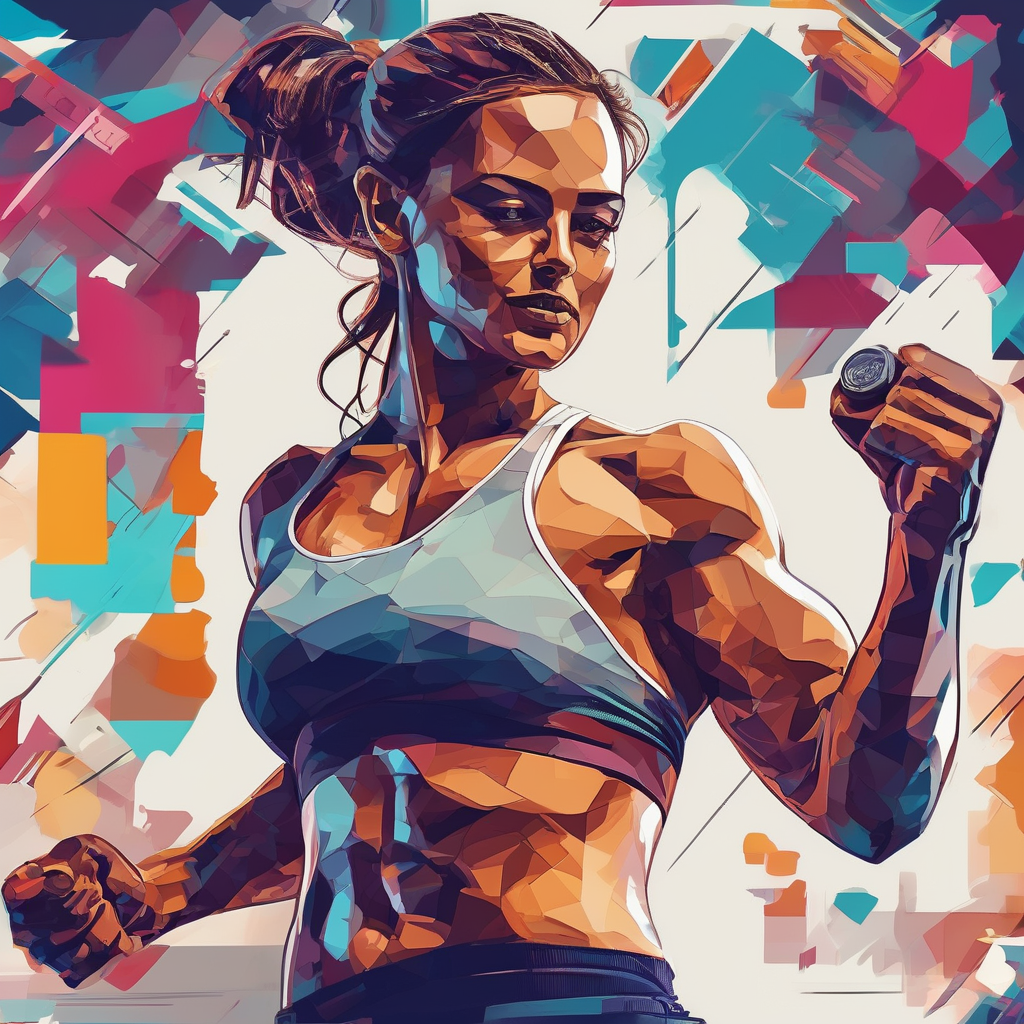

In [ ]:
image

In [ ]:
image.save("image_of_Fitness_6.png")

# **OTHER IMAGES GENERATED UNDER THIS POST FOR COMPARISON AND MORE OPTIONS**

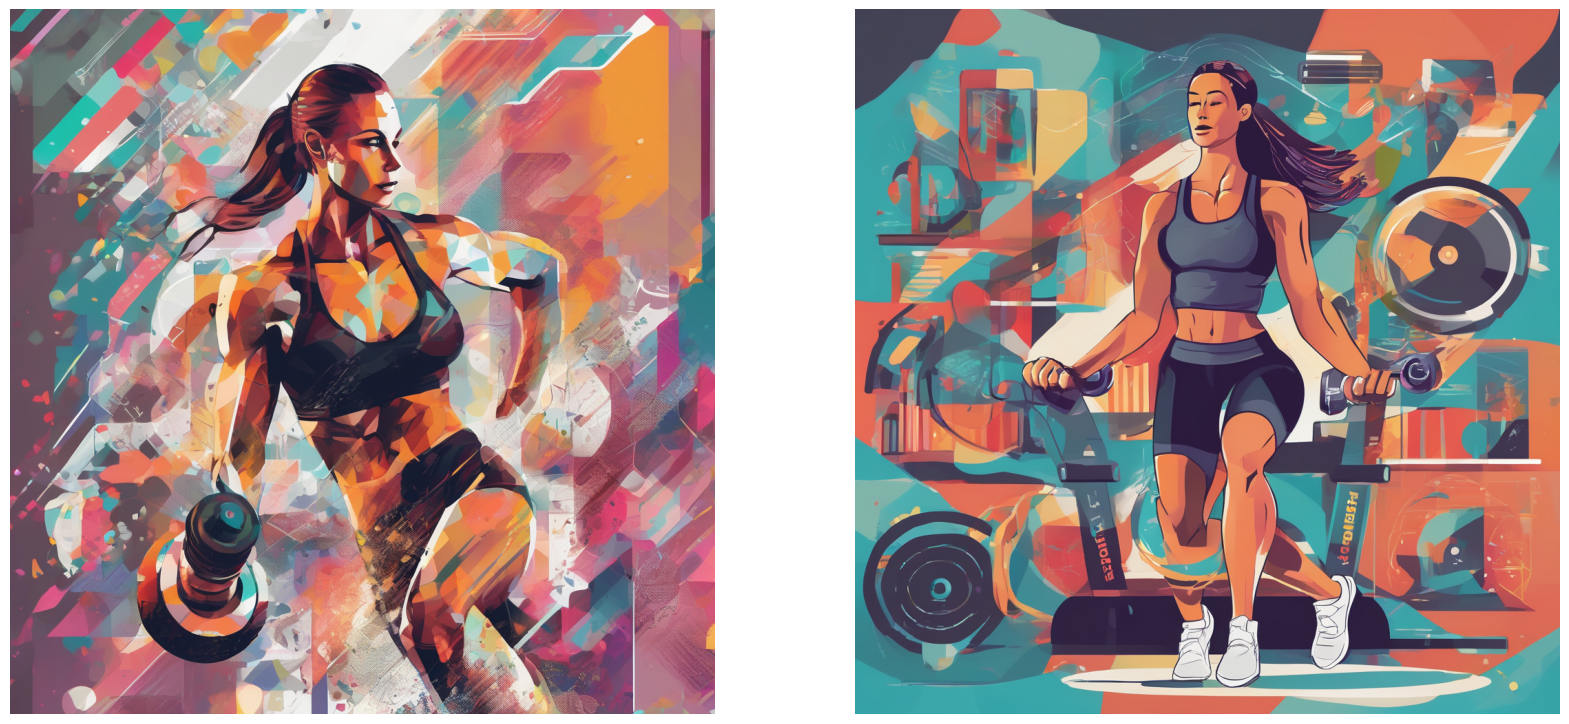

In [ ]:
# Path to images
image_path_1 = 'image_of_Fitness_2.png'
image_path_2 = 'image_of_Fitness_3.png'

# Loading the images
img_1 = mpimg.imread(image_path_1)
img_2 = mpimg.imread(image_path_2)

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Displaying the first image
axes[0].imshow(img_1)
axes[0].axis('off')  # Turn off axis

# Displaying the second image
axes[1].imshow(img_2)
axes[1].axis('off')  # Turn off axis

# Show the plot
plt.show()


**Similar to the text generation, this part is just a repetition for the image generation to the second blog post and is also necessary to proof check output**

In [ ]:
#loading 2nd blog post generated from Mistral 7B
with open('generated_blog_post2.txt', 'r', encoding='utf-8') as file:
    generated_blog_post = file.read()

print(generated_blog_post)

Fostering Mental Health Through Fitness

The COVID-19 pandemic has had an unprecedented impact on the physical and mental health of people around the world. As we continue to navigate through this challenging time, it is essential to prioritize our overall well-being by incorporating activities that promote both physical fitness and mental health. In this article, we will explore how fitness can play a vital role in fostering mental health and provide practical tips for integrating exercise into your daily routine.

Mind-Body Exercise Regimens

Engaging in mind-body exercises such as yoga or tai chi can be incredibly beneficial for promoting mental well-being. These practices involve synchronizing movement with breath, which helps to calm the mind, reduce stress, and improve focus. Additionally, the social aspect of participating in group classes can foster a sense of community and belonging, further enhancing mental health.

Nutritional Wellness for Mental Clarity

Proper nutrition pl

In [ ]:
#tryout 2
# Function to extract the first sentence
def extract_first_sentence(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    return ' '.join(sentences[:1])

# Extract the first three sentences from the generated text
first_sentence = extract_first_sentence(generated_blog_post)

# Define a style for the image, you can customize this part
#style_description = ("An artistic, high-resolution image blending surrealism and realism in a digital art style, "
                     #"vividly capturing the dynamic intersection of fitness and mental wellness. "
                     #"The scene should fuse elements of vibrant urban fitness activities, like dynamic dance movements "
                     #"or urban parkour, with ethereal and dreamlike mental spaces, such as floating islands or "
                     #"fantastical gardens. The color palette should be bold and striking, with deep contrasts, "
                     #"incorporating neon accents and glowing elements against darker backgrounds, to create "
                     #"a visually stunning and thought-provoking contrast that symbolizes the energizing impact of "
                     #"physical activity and the profound depth of mental introspection.")

## this style_ description can also be explored
style_description = ("A captivating, ultra-high-resolution image in a mixed-media style, combining elements of digital art and photorealism. "
                     "The composition should artistically weave together scenes of dynamic outdoor fitness activities - like trail running, rock climbing, "
                     "or outdoor yoga - with surreal, dreamlike elements that symbolize mental clarity and emotional well-being. Imagine a backdrop of "
                     "breathtaking landscapes, from mountain peaks to serene beaches, merged with abstract shapes and patterns that flow like energy or "
                     "thought waves. The color scheme should be vivid and rich, using a spectrum of colors from natural earth tones to bright, energizing "
                     "hues, creating a visual metaphor for the journey towards holistic health and well-being.")

# Create an image generation prompt using the extracted sentences and the style description
image_prompt = f"Create {style_description} that visually represents: {first_sentence} and pay attention to details."

# Generate the image
image = generator(image_prompt).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['from mountain peaks to serene beaches, merged with abstract shapes and patterns that flow like energy or thought waves. the color scheme should be vivid and rich, using a spectrum of colors from natural earth tones to bright, energizing hues, creating a visual metaphor for the journey towards holistic health and well - being. that visually represents : write me a blog post about this topic : fostering mental health through fitness and include subtopics : mind - body exercise regimens | nutritional wellness for mental clarity | community and group fitness dynamics | restorative environments for recovery in a well - formatted and structured paragraphs. mind - body exercise regimens the mind - body connection is an important component of overall health, which can be enhanced through exercise regimens that focus on both the physical and mental aspects of fitness. and pay attention to de

  0%|          | 0/50 [00:00<?, ?it/s]

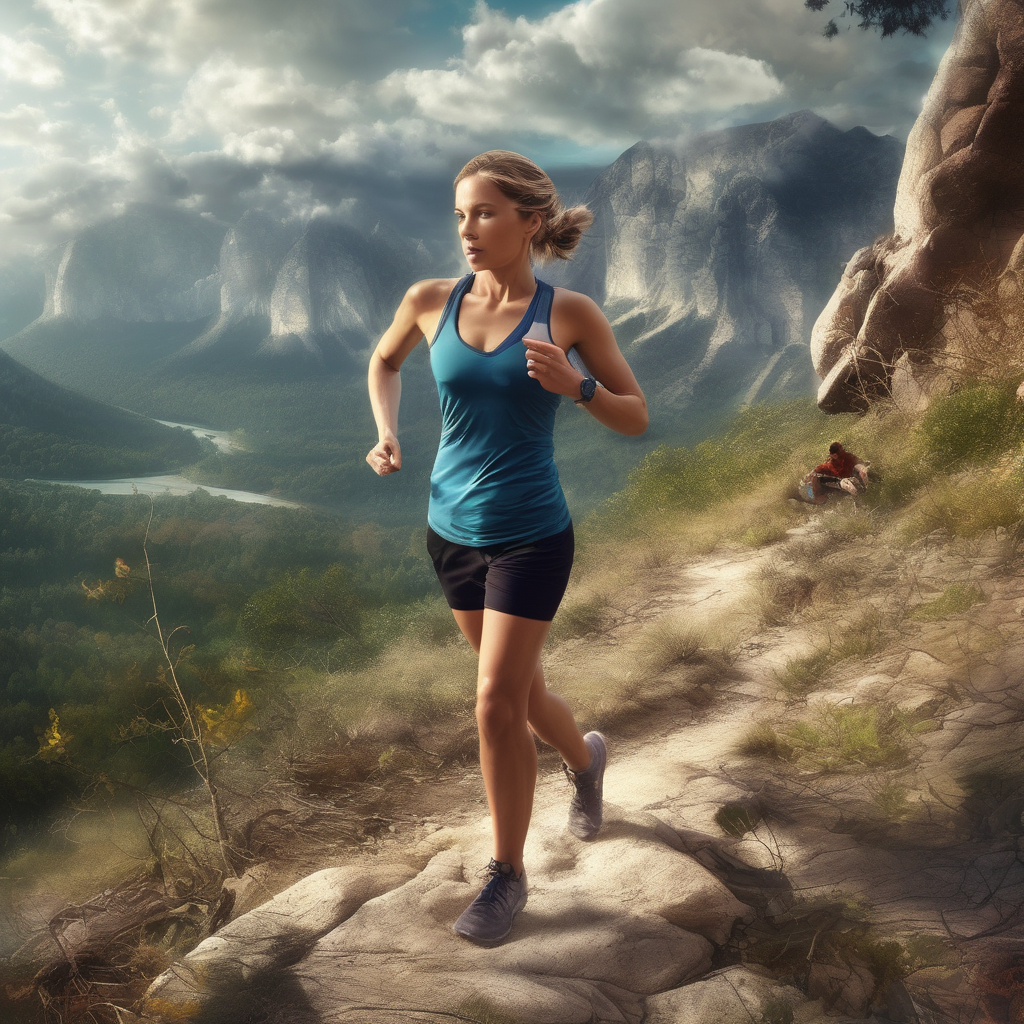

In [ ]:
image

In [ ]:
image.save("image_of_Fitness_7.png")

**These images were also generated from the style_description which has been commented out. This is done just to explore other description styles.**

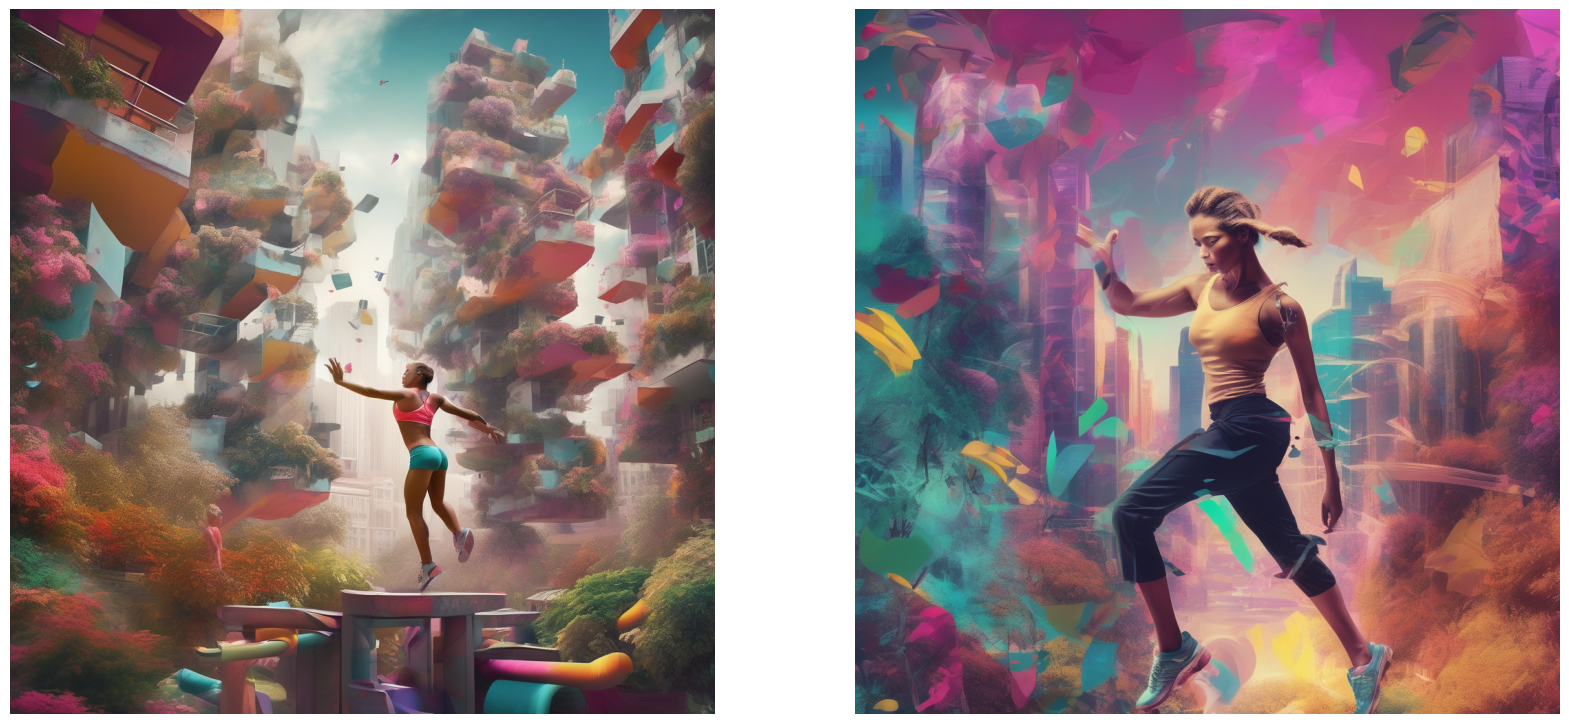

In [ ]:
# Path to images
image_path_1 = 'image_of_Fitness_4.png'
image_path_2 = 'image_of_Fitness_5.png'

# Loading the images
img_1 = mpimg.imread(image_path_1)
img_2 = mpimg.imread(image_path_2)

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Displaying the first image
axes[0].imshow(img_1)
axes[0].axis('off')  # Turn off axis

# Displaying the second image
axes[1].imshow(img_2)
axes[1].axis('off')  # Turn off axis

# Show the plot
plt.show()

I am incredibly fascinated with AI and its unlimited capabilities. We can explore with several imaginations and creativity. This are several capable models like DALL.E that can be utilized.